<a href="https://colab.research.google.com/github/fatihcelikeee/FirstMachineLearningCodes/blob/master/facialExpressionRecognitionLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Facial Expression Recognition Learning

---


* **Language:** Python 

* **Libaries:** Keras/TensorFlow

* **Cloud:** Google Cloud, ücretsiz Colab servisi (Tesla K80 GPU)

* **Dataset:** [KAGGLE- Challenges in Representation Learning: Facial Expression Recognition Challenge](https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data)

**Extra resources:** 

1. [Pre-Processing](https://github.com/Hanzhuo/Facial-Expression-Recognition-with-TensorFlow-Convolutional-Neural-Networks/blob/master/CNN_Facial_Expression_Recogonition.ipynb)
2. [Train and Model](https://github.com/piyush2896/Facial-Expression-Recognition-Challenge/blob/master/Facial-Expression-Recognition-Challenge.ipynb)
3. [Visualization and additional definitions](https://github.com/sachin-kmr/ML-Facial-Expression-Recognition/blob/master/exp_recognition.ipynb)

##Importing Libaries

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
import os

os.chdir('/gdrive/My Drive/workSpace/facialExpressionRecognitionLearning')

In [ ]:
!ls

challenges-in-representation-learning-facial-expression-recognition-challenge
facialExpressionRecognitionLearning.ipynb


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import keras
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint

##Reading Dataset

In [ ]:
root = "/gdrive/My Drive/workSpace/facialExpressionRecognitionLearning/"
data = pd.read_csv(root + "challenges-in-representation-learning-facial-expression-recognition-challenge/icml_face_data.csv")
data.shape

(35887, 3)

In [ ]:
data.head()

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


##Preprocessing

In [ ]:
np.unique(data[" Usage"].values.ravel())
trainData = data[data[" Usage"] == "Training"]
trainPixels = trainData[" pixels"].str.split(" ").tolist() 
trainPixels = pd.DataFrame(trainPixels, dtype=int)
trainImages = trainPixels.values
trainImages = trainImages.astype(np.float)

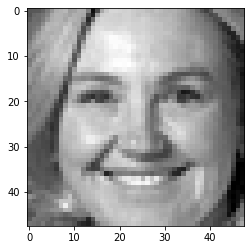

In [ ]:
plt.imshow(trainImages[1905].reshape(48,48),cmap="gray")

In [ ]:
trainLabelsFlat=trainData["emotion"].values.ravel()
trainLabelsCount = np.unique(trainLabelsFlat).shape[0]
print('Number of different facial expressions: %d'%trainLabelsCount)

Number of different facial expressions: 7


In [ ]:
import tensorflow as tf
yTrain = tf.keras.utils.to_categorical(trainData["emotion"])
yTrain = yTrain.astype(np.uint8)

print(yTrain.shape)

(28709, 7)


In [ ]:
np.unique(data[" Usage"].values.ravel()) 

print('Number of samples in the test dataset: %d'%(len(data[data[" Usage"] == "PublicTest"])))

Number of samples in the test dataset: 3589


In [ ]:
testData = data[data[" Usage"] == "PublicTest"]
testPixels = testData[" pixels"].str.split(" ").tolist() 

testPixels = pd.DataFrame(testPixels, dtype=int)
testImages = testPixels.values
testImages = testImages.astype(np.float)


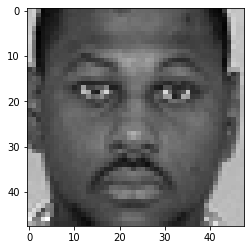

In [ ]:
plt.imshow(testImages[1905].reshape(48,48),cmap="gray")

In [ ]:
yTest = tf.keras.utils.to_categorical(testData["emotion"])
yTest = yTest.astype(np.uint8)

print(yTest.shape)

(3589, 7)


##Modeling

In [ ]:
model = Sequential()

#First Layer
model.add(Conv2D(64, 3, data_format="channels_last", kernel_initializer="he_normal", input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation("relu"))

#Second Layer
model.add(Conv2D(64, 3))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2), strides = 2))
model.add(Dropout(0.5))

#3. Layer
model.add(Conv2D(64, 3))
model.add(BatchNormalization())
model.add(Activation("relu"))

#4. Layer
model.add(Conv2D(64, 3))
model.add(BatchNormalization())
model.add(Activation("relu"))

#5. Layer
model.add(Conv2D(32, 3))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2), strides = 2))
model.add(Dropout(0.5))

#FULL CONNECTION LAYER
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.5))

#Last Layer
model.add(Dense(7))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 46, 46, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 44, 44, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 44, 44, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 64)       

In [ ]:
xTrain = trainImages.reshape(-1,48,48,1)
xTest = testImages.reshape(-1,48,48,1)
print(xTrain.shape)
print(xTest.shape)

(28709, 48, 48, 1)
(3589, 48, 48, 1)


In [ ]:
checkpointer = ModelCheckpoint(filepath=root + "challenges-in-representation-learning-facial-expression-recognition-challenge/faceModel.h5", verbose = 1, save_best_only= True)
epochs = 10
batchSize = 100

hist = model.fit(xTrain,yTrain,
                 epochs=epochs,
                 shuffle=True,
                 batch_size = batchSize,
                 validation_data = (xTest,yTest),
                 callbacks=[checkpointer],
                 verbose = 2)
modelJson = model.to_json()
with open (root+"challenges-in-representation-learning-facial-expression-recognition-challenge/faceModel.h5", "w+") as jsonFile:
  jsonFile.write(modelJson)

Epoch 1/10
288/288 - 51s - loss: 1.8570 - accuracy: 0.2933 - val_loss: 1.5000 - val_accuracy: 0.4179

Epoch 00001: val_loss improved from inf to 1.50000, saving model to /gdrive/My Drive/workSpace/facialExpressionRecognitionLearning/challenges-in-representation-learning-facial-expression-recognition-challenge/faceModel.h5
Epoch 2/10
288/288 - 19s - loss: 1.5357 - accuracy: 0.4035 - val_loss: 1.3714 - val_accuracy: 0.4609

Epoch 00002: val_loss improved from 1.50000 to 1.37144, saving model to /gdrive/My Drive/workSpace/facialExpressionRecognitionLearning/challenges-in-representation-learning-facial-expression-recognition-challenge/faceModel.h5
Epoch 3/10
288/288 - 18s - loss: 1.4091 - accuracy: 0.4542 - val_loss: 1.3278 - val_accuracy: 0.4937

Epoch 00003: val_loss improved from 1.37144 to 1.32777, saving model to /gdrive/My Drive/workSpace/facialExpressionRecognitionLearning/challenges-in-representation-learning-facial-expression-recognition-challenge/faceModel.h5
Epoch 4/10
288/288 -

In [ ]:
checkpointer = ModelCheckpoint(filepath=root + "challenges-in-representation-learning-facial-expression-recognition-challenge/faceModelv2.h5", verbose = 1, save_best_only= True)
epochs = 10
batchSize = 100

hist = model.fit(xTrain,yTrain,
                 epochs=epochs,
                 shuffle=True,
                 batch_size = batchSize,
                 validation_data = (xTest,yTest),
                 callbacks=[checkpointer],
                 verbose = 2)
modelJson = model.to_json()
with open (root+"challenges-in-representation-learning-facial-expression-recognition-challenge/faceModel.h5", "w+") as jsonFile:
  jsonFile.write(modelJson)

Epoch 1/10
288/288 - 19s - loss: 1.1318 - accuracy: 0.5716 - val_loss: 1.1093 - val_accuracy: 0.5754

Epoch 00001: val_loss improved from inf to 1.10934, saving model to /gdrive/My Drive/workSpace/facialExpressionRecognitionLearning/challenges-in-representation-learning-facial-expression-recognition-challenge/faceModelv2.h5
Epoch 2/10
288/288 - 19s - loss: 1.1208 - accuracy: 0.5742 - val_loss: 1.0978 - val_accuracy: 0.5851

Epoch 00002: val_loss improved from 1.10934 to 1.09782, saving model to /gdrive/My Drive/workSpace/facialExpressionRecognitionLearning/challenges-in-representation-learning-facial-expression-recognition-challenge/faceModelv2.h5
Epoch 3/10
288/288 - 19s - loss: 1.1036 - accuracy: 0.5802 - val_loss: 1.0898 - val_accuracy: 0.5862

Epoch 00003: val_loss improved from 1.09782 to 1.08975, saving model to /gdrive/My Drive/workSpace/facialExpressionRecognitionLearning/challenges-in-representation-learning-facial-expression-recognition-challenge/faceModelv2.h5
Epoch 4/10
288

In [ ]:
checkpointer = ModelCheckpoint(filepath=root + "challenges-in-representation-learning-facial-expression-recognition-challenge/faceModelv3.h5", verbose = 1, save_best_only= True)
epochs = 300
batchSize = 100

hist = model.fit(xTrain,yTrain,
                 epochs=epochs,
                 shuffle=True,
                 batch_size = batchSize,
                 validation_data = (xTest,yTest),
                 callbacks=[checkpointer],
                 verbose = 2)
modelJson = model.to_json()
with open (root+"challenges-in-representation-learning-facial-expression-recognition-challenge/faceModel.h5", "w+") as jsonFile:
  jsonFile.write(modelJson)

Epoch 1/300
288/288 - 19s - loss: 1.0018 - accuracy: 0.6182 - val_loss: 1.0752 - val_accuracy: 0.5993

Epoch 00001: val_loss improved from inf to 1.07516, saving model to /gdrive/My Drive/workSpace/facialExpressionRecognitionLearning/challenges-in-representation-learning-facial-expression-recognition-challenge/faceModelv3.h5
Epoch 2/300
288/288 - 19s - loss: 0.9997 - accuracy: 0.6259 - val_loss: 1.0452 - val_accuracy: 0.6055

Epoch 00002: val_loss improved from 1.07516 to 1.04521, saving model to /gdrive/My Drive/workSpace/facialExpressionRecognitionLearning/challenges-in-representation-learning-facial-expression-recognition-challenge/faceModelv3.h5
Epoch 3/300
288/288 - 19s - loss: 0.9912 - accuracy: 0.6272 - val_loss: 1.0573 - val_accuracy: 0.5954

Epoch 00003: val_loss did not improve from 1.04521
Epoch 4/300
288/288 - 19s - loss: 0.9812 - accuracy: 0.6308 - val_loss: 1.0225 - val_accuracy: 0.6166

Epoch 00004: val_loss improved from 1.04521 to 1.02253, saving model to /gdrive/My Dr